In [47]:
#%reload_ext nb_black

# Szeged, Hungary Weather
checking assumption in linear regression models

In [12]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.diagnostic import het_breuschpagan

import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

%matplotlib inline

In [9]:
from sqlalchemy import create_engine
from IPython.display import display_html

In [11]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# No need for an open connection, because only doing a single query
engine.dispose()


df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [13]:
df.isna().mean()

date                   0.0
summary                0.0
preciptype             0.0
temperature            0.0
apparenttemperature    0.0
humidity               0.0
windspeed              0.0
windbearing            0.0
visibility             0.0
loudcover              0.0
pressure               0.0
dailysummary           0.0
dtype: float64

In [31]:
drop_cols = ["date", "summary", "preciptype", "apparenttemperature", "visibility", "loudcover", "dailysummary"]
df = df.drop(columns=drop_cols)

In [32]:
df.head()

,temperature,humidity,windspeed,windbearing,pressure
0,9.472222,0.89,14.1197,251.0,1015.13
1,9.355556,0.86,14.2646,259.0,1015.63
2,9.377778,0.89,3.9284,204.0,1015.94
3,8.288889,0.83,14.1036,269.0,1016.41
4,8.755556,0.83,11.0446,259.0,1016.51


In [33]:
X = df[["humidity", "windspeed", "windbearing", "pressure"]]
y = df["temperature"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

Train Score: 0.4214854607250208
Test Score: 0.4169121840570047


In [37]:
X_train_const = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_const).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:19:11   Log-Likelihood:            -2.6241e+05
No. Observations:               77162   AIC:                         5.248e+05
Df Residuals:                   77157   BIC:                         5.249e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9541      0.258    147.058      0.000      37.448      38.460
humidity      -32.5080      0.137   -236.883      0.000     -32.777     -32.239
windspeed      -0.1992      0.004    -51.137      0.000      -0.207      -0.192
windbearing     0.0038      0.000     15.479      0.000       0.003       0.004
pressure       -0.0007      0.000     -3.067      0.002      -0.001      -0.000
==============================================================================
Omnibus:                     2685.747   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3019.893
Skew:                          -0.453   Prob(JB):                         0.00
Kurtosis:                       3.344   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
print(model.intercept_)
print(model.coef_)

37.9540705993263
[-3.25079855e+01 -1.99185599e-01  3.78991600e-03 -6.78668049e-04]


Our model only captures about 42% of the variance in the data so it's not a good model. 

In [53]:
predictions = model.predict(X)
errors = y_test - predictions

print("Mean of the errors in the model is: {}".format(np.mean(errors)))

ValueError: operands could not be broadcast together with shapes (19291,) (96453,) 

Checking on assumptions

* Linearity of models in their coefficients
* The error term's expected value
* Homoscedasticity
* Low multicollinearity
* Uncorrelated error terms
* Independence of the features and errors
* Normality of the errors

Model has linear coefficients and a constant so assumption #1 and #2 are satisifed.

In [40]:
# doing a Bartlett Levene test to check for homoscedasticity 
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2459.04 and p value is 0
Levene test statistic value is 2314.22 and p value is 0


In [48]:
# null hypothesis: data is homoscedastic
true_residuals = lm.resid
_, p, _, _ = het_breuschpagan(true_residuals, X_train_const)
p

1.673515027980888e-82

Bartlett Levene test and the Breuschpagen test shows that our model is heteroscedastic so we need to look including more variables or perhaps skew.

None of our variables are high correlated with each other so we satisfy the multicollinearity assumption.

In [42]:
df.corr()

,temperature,humidity,windspeed,windbearing,pressure
temperature,1.000000,-0.632255,0.008957,0.029988,-0.005447
humidity,-0.632255,1.000000,-0.224951,0.000735,0.005454
windspeed,0.008957,-0.224951,1.000000,0.103822,-0.049263
windbearing,0.029988,0.000735,0.103822,1.000000,-0.011651
pressure,-0.005447,0.005454,-0.049263,-0.011651,1.000000


Make a scatter plot with Visibility on the x axis and model predictions as the y axis

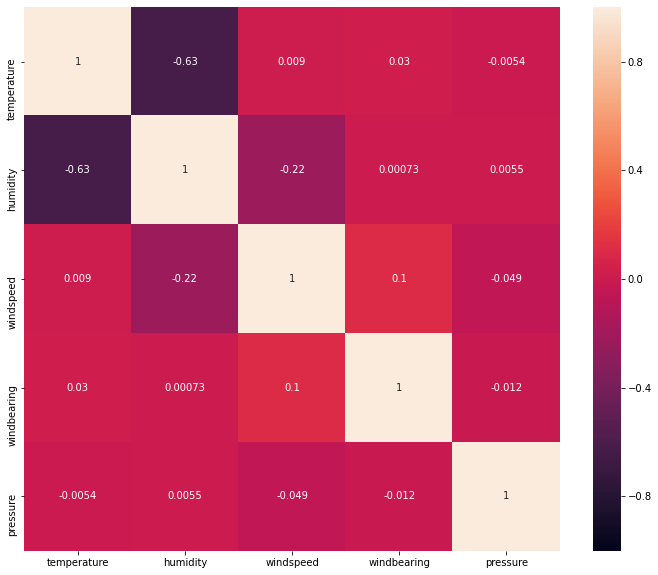

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),vmin = -1, vmax = 1, annot=True)

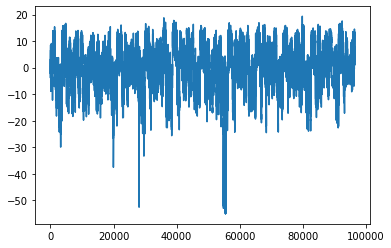

In [43]:
plt.plot(errors)
plt.show()

C:\Users\Mike\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:660: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,
C:\Users\Mike\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


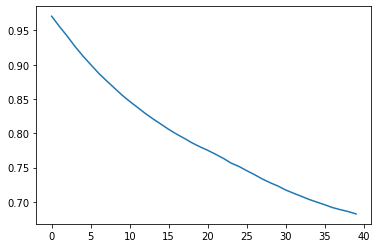

In [44]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

There appears to be correlated error terms so we need to include more variables into the model.

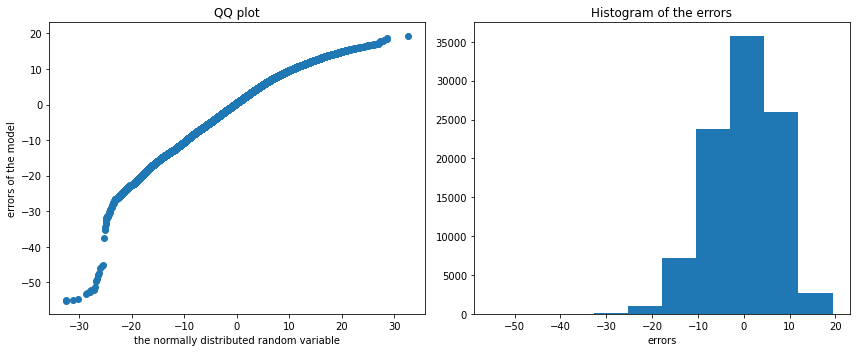

In [45]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # Sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()